In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def hebbian_learning(X, Y):
    """
    Hebbian Learning Rule:
    w = w + X * Y
    b = b + Y
    """
    # Initialize weights and bias
    w = np.zeros(X.shape[1])
    b = 0

    # Update rule for each training example
    for i in range(len(X)):
        w = w + X[i] * Y[i]
        b = b + Y[i]
    return w, b


In [3]:
# Define input and outputs for different logic gates
gates = {
    "AND": {
        "X": np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]]),
        "Y": np.array([1, -1, -1, -1])
    },
    "OR": {
        "X": np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]]),
        "Y": np.array([1, 1, 1, -1])
    },
    "NOR": {
        "X": np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]]),
        "Y": np.array([-1, -1, -1, 1])
    }
}


In [4]:
def test_gate(name, X, Y):
    w, b = hebbian_learning(X, Y)
    print(f"\n{name} Gate:")
    print("Weights:", w)
    print("Bias:", b)

    # Test the model
    print("Input\tOutput\tPredicted")
    for i in range(len(X)):
        y_pred = np.sign(np.dot(X[i], w) + b)
        print(X[i], "\t", Y[i], "\t", int(y_pred))
    return w, b

results = {}
for gate_name, data in gates.items():
    results[gate_name] = test_gate(gate_name, data["X"], data["Y"])



AND Gate:
Weights: [2. 2.]
Bias: -2
Input	Output	Predicted
[1 1] 	 1 	 1
[ 1 -1] 	 -1 	 -1
[-1  1] 	 -1 	 -1
[-1 -1] 	 -1 	 -1

OR Gate:
Weights: [2. 2.]
Bias: 2
Input	Output	Predicted
[1 1] 	 1 	 1
[ 1 -1] 	 1 	 1
[-1  1] 	 1 	 1
[-1 -1] 	 -1 	 -1

NOR Gate:
Weights: [-2. -2.]
Bias: -2
Input	Output	Predicted
[1 1] 	 -1 	 -1
[ 1 -1] 	 -1 	 -1
[-1  1] 	 -1 	 -1
[-1 -1] 	 1 	 1


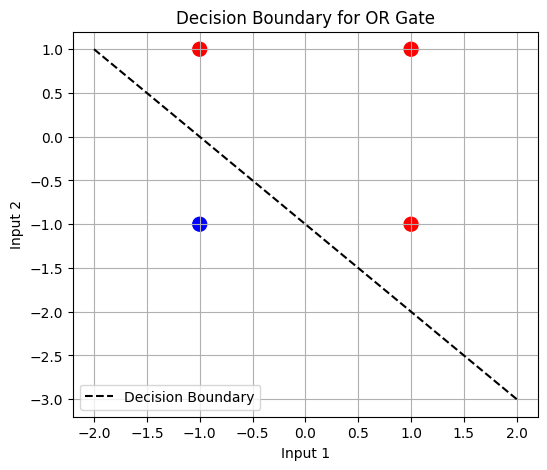

In [5]:
# Visualize one example: OR Gate
gate = "OR"
X = gates[gate]["X"]
Y = gates[gate]["Y"]
w, b = results[gate]

x1 = np.linspace(-2, 2, 100)
x2 = -(w[0] * x1 + b) / w[1]

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr', s=100)
plt.plot(x1, x2, 'k--', label='Decision Boundary')
plt.title(f"Decision Boundary for {gate} Gate")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.legend()
plt.grid(True)
plt.show()
